In [45]:
import os

import numpy as np

from reproject import reproject_interp

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import Angle

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [46]:
def plot():

    def rotate_wcs(wcs, angle):

        '''
        Rotates a WCS projection by some angle

        Parameters:

            wcs : astropy.wcs.wcs.WCS
                The original WCS projection

            angle : int
                The angle (in degrees) to rotate the WCS projection

        Returns:

            rotated_wcs : astropy.wcs.wcs.WCS
                The rotated WCS projection
        '''

        # Define the rotation angle
        angle = Angle(angle, unit='deg')

        # Get the CD matrix from the original WCS projection
        cd_matrix = wcs.wcs.cd

        # Calculate the rotation matrix
        cos_angle = np.cos(angle.rad)
        sin_angle = np.sin(angle.rad)
        rotation_matrix = np.array([[cos_angle, -sin_angle], [sin_angle, cos_angle]], dtype=np.float64)

        # Apply the rotation to the CD matrix
        rotated_cd_matrix = np.dot(cd_matrix, rotation_matrix)

        # Update the CD matrix in the rotated WCS projection
        rotated_wcs = wcs.deepcopy()
        rotated_wcs.wcs.cd = rotated_cd_matrix

        return rotated_wcs

    home = os.getcwd()
    data = f'{home}/data'
    figs = f'{home}/figs'
    results = f'{home}/results'

    hst_f275w_file = f'{data}/hst/V5.0_PSZ1G311.65-18.48_F275W_0.03g0.6_crsc1.2_0.7crsn3.5_3.0_drc_sci.fits'
    hst_f606w_file = f'{data}/hst/V5.0_PSZ1G311.65-18.48_F606W_0.03g0.6_crsc1.2_0.7crsn3.5_3.0_drc_sci.fits'
    lya_nb_f390w_file = f'{results}/Lya_cont_sub_F390W.fits'
    lya_nb_f555w_file = f'{results}/Lya_cont_sub_F555W.fits'

    files = np.array([lya_nb_f555w_file, lya_nb_f390w_file, hst_f275w_file], dtype=str)

    # Position, dimensions, and orientations of the boxes defining the areas of the inset, zoom-in axes, 
    # defined in pixel coordinates of the HST F606W observation's WCS projection
    center_n = (4591, 5303)
    center_nw = (5093, 4944)
    width, height = 464, 86
    angle_n = -19 
    angle_nw = -48 

    centers = [center_n, center_nw]
    angles = [-19, -48]

    # Get the WCS projection of the HST F606W observations
    hst_f606w_wcs = WCS(fits.getheader(hst_f606w_file))

    fig, ax = plt.subplots(6,1)

    for i, file in enumerate(files):

        data = fits.getdata(file)

        wcs = WCS(fits.getheader(file))

        for j, axes in enumerate([ax[0 + i], ax[3 + i]]):

            wcs_rotated = rotate_wcs(wcs, angles[j])

            data, _ = reproject_interp((data, wcs), wcs_rotated, (5500,5500))

            axes = plt.subplot(611 + 3 * j + i, projection=wcs_rotated)

            axes.imshow(data, origin='lower', cmap='Greys', #norm=LogNorm(vmin=0.001 * np.median(np.abs(data)), vmax=10 * np.median(np.abs(data))),
                interpolation='none')

            center = wcs_rotated.world_to_pixel_values([hst_f606w_wcs.pixel_to_world_values([[*centers[j]]])[0]])[0]

            axes.set_xlim(center[0] - width/2, center[0] + width/2)
            axes.set_ylim(center[1] - height/2, center[1] + height/2)

            for k, coord_ax in enumerate([*axes.coords]):

                # Disable the ticks, tick labels, and axis label of the cordinate axis
                coord_ax.set_ticks_visible(False)
                coord_ax.set_ticklabel_visible(False)
                coord_ax.set_axislabel('')

    fig.savefig(f'{figs}/lya_and_lyc_maps.pdf', bbox_inches='tight')

C:\Users\15136\AppData\Local\Temp/ipykernel_17428/1283696385.py:82: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes = plt.subplot(611 + 3 * j + i, projection=wcs_rotated)
C:\Users\15136\AppData\Local\Temp/ipykernel_17428/1283696385.py:82: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes = plt.subplot(611 + 3 * j + i, projection=wcs_rotated)
C:\Users\15136\AppData\Local\Temp/ipykernel_17428/1283696385.py:82: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes = plt.subplot(611 + 3 * j + i, projection=wcs_rotated)
C:\Users\15136\AppData\Local\Temp/ipykernel_17428/1283696385.py:82: MatplotlibDeprecationWarni

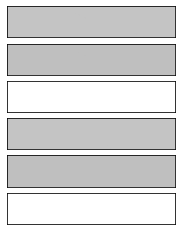

In [47]:
plot()